<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/TUTORIAL_Build_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [6]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231 -p /content/stock_data

Dataset URL: https://www.kaggle.com/datasets/szrlee/stock-time-series-20050101-to-20171231
License(s): CC0-1.0
  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 429MB/s]


In [23]:
!unzip -o /content/stock_data/*.zip -d /content/stock_data

Archive:  /content/stock_data/stock-time-series-20050101-to-20171231.zip
  inflating: /content/stock_data/AABA_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/AXP_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/BA_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/CAT_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/CVX_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/DIS_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/GE_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/GS_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/HD_2006-01-01_to_2018-01-01.csv  
  inflating: /content/stock_data/IBM_2006

In [24]:
import pandas as pd

# Adjust path if necessary
dataset = pd.read_csv('/content/stock_data/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [25]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [26]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [27]:
# Splitting the data into training and test sets
training_set = dataset[:'2016'].iloc[:, 1:2].values  # Using the 'High' column
test_set = dataset['2017':].iloc[:, 1:2].values

In [28]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

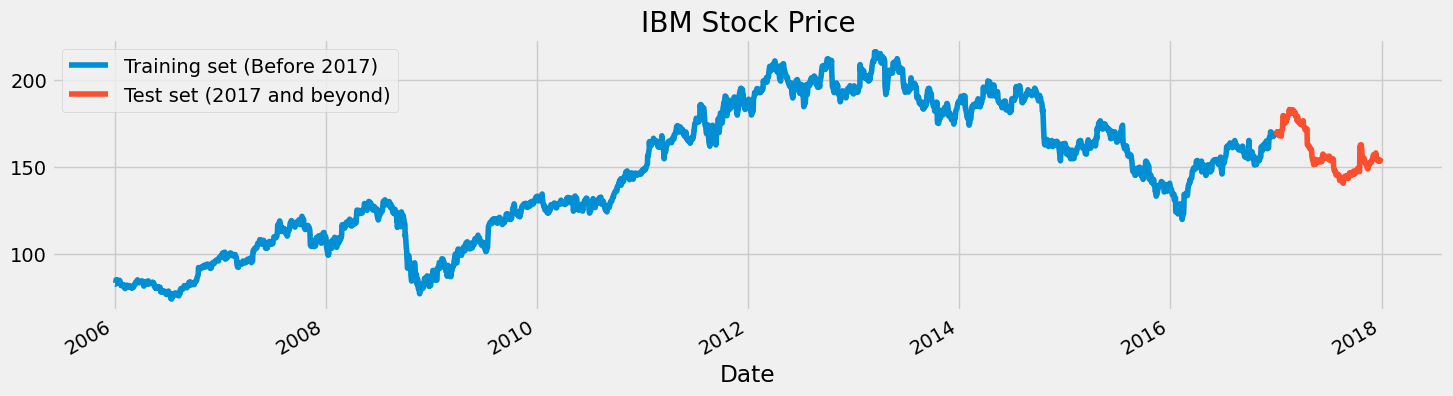

In [29]:
# Plotting the training and test sets
dataset["High"][:'2016'].plot(figsize=(16, 4), legend=True)
dataset["High"]['2017':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2017)', 'Test set (2017 and beyond)'])
plt.title('IBM Stock Price')
plt.show()

In [30]:
#  Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [31]:
# Creating the data structure with 60 timesteps
X_train = []
y_train = []
for i in range(60, 2769):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping X_train for efficient modeling
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building and Training the LSTM Model

In [26]:
# Building the LSTM model
regressor = Sequential()

# First LSTM layer with Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

# Training the model
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - loss: 0.0371
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - loss: 0.0089
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0098
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - loss: 0.0072
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - loss: 0.0071
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 0.0054
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - loss: 0.0049
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 0.0057
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 115ms/step - loss: 0.0044
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0046
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.0039
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - loss: 0.0038
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - loss: 0.0041
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - loss: 0.0034
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [34]:
# Preparing the test set
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Preparing X_test
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


NameError: name 'regressor' is not defined

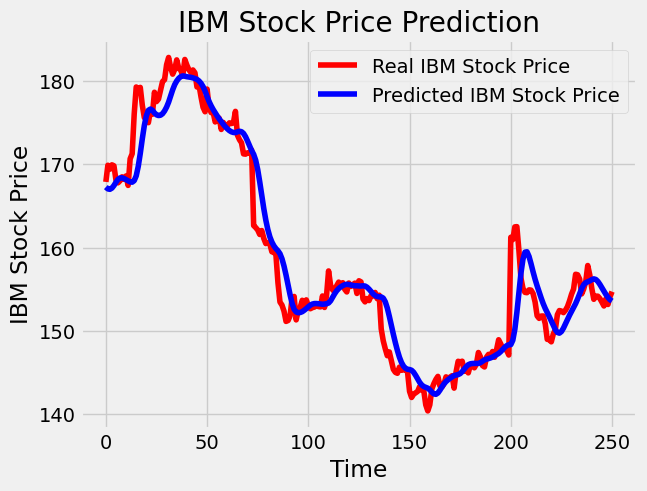

In [28]:
# Plotting the results
def plot_predictions(test, predicted):
    plt.plot(test, color='red', label='Real IBM Stock Price')
    plt.plot(predicted, color='blue', label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

plot_predictions(test_set, predicted_stock_price)

In [29]:
# Calculating RMSE
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

return_rmse(test_set, predicted_stock_price)

The root mean squared error is 2.9340945377848424.


# Building and Training the GRU Model

In [32]:
# Building the GRU model
regressorGRU = Sequential()

# First GRU layer with Dropout regularization
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Output layer
regressorGRU.add(Dense(units=1))

# Compiling the model
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# Training the model
regressorGRU.fit(X_train, y_train, epochs=50, batch_size=150)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - loss: 0.1340
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - loss: 0.0279
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step - loss: 0.0080
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - loss: 0.0046
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 333ms/step - loss: 0.0043
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - loss: 0.0039
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 421ms/step - loss: 0.0036
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step - loss: 0.0035
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 354ms/step - loss: 0.0032
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 302ms/step - loss: 0.0035
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - loss: 0.0035
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - loss: 0.0031
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 354ms/step - loss: 0.0028
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 276ms/step - loss: 0.0028
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 298ms/step - loss

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step


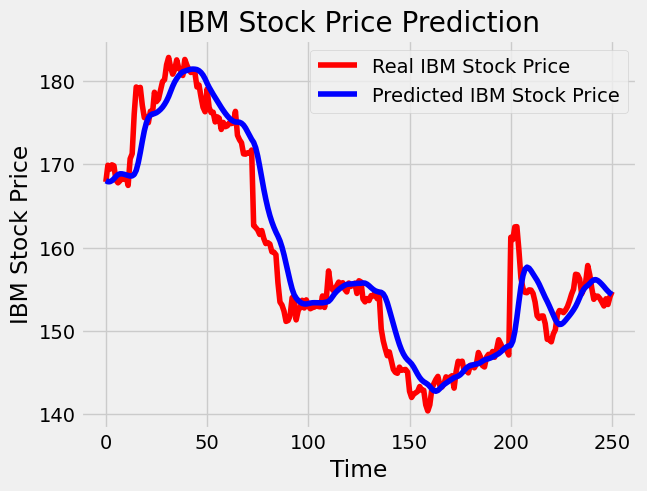

The root mean squared error is 3.262642219538451.


In [35]:
# Preparing the test set
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Preparing X_test
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

# Visualizing the results
plot_predictions(test_set, GRU_predicted_stock_price)

# Evaluating the model
return_rmse(test_set, GRU_predicted_stock_price)